In [1]:
import mnist # pip install mnist
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D
from tensorflow.keras.utils import to_categorical

2022-02-10 11:23:18.629240: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-10 11:23:18.629275: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Load Data-> 2 Ways

In [2]:
# X_train = mnist.train_images()
# y_train = mnist.train_labels()
# X_test = mnist.test_images()
# y_test = mnist.test_labels()
X_train = np.load('Datasets/MNIST/x_train.npy')
y_train = np.load('Datasets/MNIST/y_train.npy')
X_test = np.load('Datasets/MNIST/x_test.npy')
y_test = np.load('Datasets/MNIST/y_test.npy')

In [3]:
def Normalize(data):
    return data / 255

In [4]:
X_train = Normalize(X_train)
X_test = Normalize(X_test)
print(X_train.shape, " ", X_test.shape)

(60000, 28, 28)   (10000, 28, 28)


In [5]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
print(X_train.shape, " ", X_test.shape)

(60000, 28, 28, 1)   (10000, 28, 28, 1)


In [8]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 30, 30, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 zero_padding2d_3 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                      

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
y_train_OHE = to_categorical(y_train)
y_test_OHE = to_categorical(y_test)

In [12]:
history = model.fit(X_train, y_train_OHE, epochs=10, validation_data=(X_test, y_test_OHE), batch_size=256)

Epoch 1/10
235/235 [==============================] - 37s 155ms/step - loss: 0.2625 - accuracy: 0.9248 - val_loss: 0.0642 - val_accuracy: 0.9787
Epoch 2/10
235/235 [==============================] - 32s 136ms/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0448 - val_accuracy: 0.9845
Epoch 3/10
235/235 [==============================] - 32s 135ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0376 - val_accuracy: 0.9880
Epoch 4/10
235/235 [==============================] - 33s 142ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0308 - val_accuracy: 0.9894
Epoch 5/10
235/235 [==============================] - 33s 142ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0280 - val_accuracy: 0.9914
Epoch 6/10
235/235 [==============================] - 34s 146ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0282 - val_accuracy: 0.9898
Epoch 7/10
235/235 [==============================] - 34s 144ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0331 - val_ac

In [13]:
import matplotlib.pyplot as plt

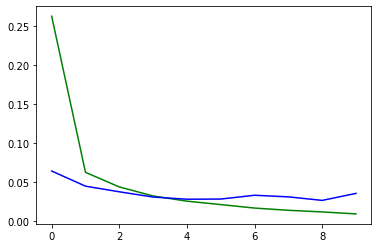

In [14]:
plt.plot(history.history['loss'], color='green', label='Train Data')
plt.plot(history.history['val_loss'], color='blue', label='Test Data')

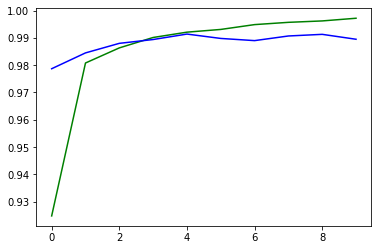

In [15]:
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Test Data')